# Looking at NBA Data

Importing data from NBA 2013 data file

In [19]:
import pandas as pd
import numpy as np
file = 'nba_2013.csv'
nba_stats = pd.read_csv(file)
nba_stats.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


## Statistics About Points

Mean and Variance <br>
$\mu = \frac{\sum x}{n}$ <br>
$\sigma^2 = \frac{\sum \left(x-\mu\right)^2}{n}$

In [9]:
pts = nba_stats['pts']
pts_mean = pts.mean()

#x-mu
differences = pts - pts_mean

#(x-mu)^2
squared_differences = differences ** 2

n = len(squared_differences)

variance = sum(squared_differences)/n

print(variance)

220836.99585496247


### Standard Deviation as a Function

Standard Deviation($\sigma$) can be found as the square root of Variance

In [10]:
def nba_sd(column):
    mean = nba_stats[column].mean()
    differences = nba_stats[column] - mean
    square_differences = differences ** 2
    variance = sum(square_differences)/ len(square_differences)
    return variance ** (1/2)

In [11]:
mp_dev = nba_sd('mp')
print(mp_dev)
ast_dev = nba_sd('ast')
print(ast_dev)

896.3256527798793
130.88329070778343


## Visualization

### Points vs Free Throw Attempts

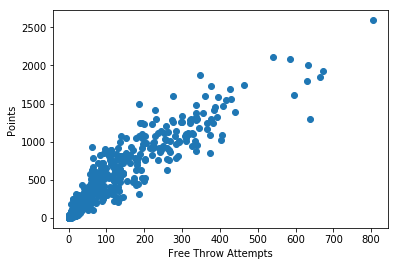

In [14]:
% matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(nba_stats['fta'], nba_stats['pts'])
plt.xlabel('Free Throw Attempts')
plt.ylabel('Points')
plt.show()

Looking at free throw attempts vs free throws, there appears to be a definitel positive correlation. The plot is tight, so there is likely a linear relationship.

### Steals Vs Personal Fouls

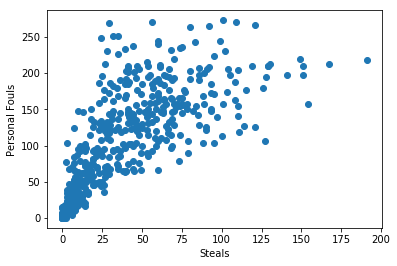

In [15]:
plt.scatter(nba_stats['stl'], nba_stats['pf'])
plt.xlabel('Steals')
plt.ylabel('Personal Fouls')
plt.show()

This plot is definitely not homoskedastic, the variance grows wildly with the number of steals.<br>
There does seem to be a strong positive correlation, but it doesn't conform to the assumptions of linear regression.

## Linear Correlation

In [16]:
from scipy.stats import pearsonr

r_fta_pts = pearsonr(nba_stats['fta'], nba_stats['pts'])
print(r_fta_pts)
r_stl_pts = pearsonr(nba_stats['stl'], nba_stats['pf'])
print(r_stl_pts)

(0.91897853840209986, 1.0071286958606185e-195)
(0.7376282167485283, 9.8463392219051404e-84)


## Covariance as a function

$cov\left(x,y\right) = \frac{\sum\limits_{i=1}^n\left(x_i-\mu_x\right)\left(y_i - \mu_y\right)}{n}$

In [17]:
def nba_cov(x, y):
    mu_x = nba_stats[x].mean()
    mu_y = nba_stats[y].mean()
    x_diff = nba_stats[x]-mu_x
    y_diff = nba_stats[y]-mu_y
    diff_product = x_diff * y_diff
    return sum(diff_product)/len(diff_product)

In [18]:
cov_stl_pf = nba_cov('stl','pf')
print('cov(stl,pts): ',cov_stl_pf)
cov_fta_pts = nba_cov('fta','pts')
print('cov(fta,pts): ',cov_fta_pts)

cov(stl,pts):  1823.3548480513116
cov(fta,pts):  56618.41398074862


### Covariance and Standard Deviation Using Numpy

Standard Deviation: Dataframe.std()<br>
Covariance: numpy.cov(series1, series2)

The covariance function returns the full covariance matrix: The main diagonal elements are the variances of the two variables, and the off diagonal values are the covariance between the two variables

**My function of computing the covariance "By Hand" comes out with a slightly different result that the numpy function**

In [24]:
cov_stl_pf = np.cov(nba_stats['stl'],nba_stats['pf'])[0,1]
print(cov_stl_pf)
cov_fta_pts = np.cov(nba_stats['fta'],nba_stats['pts'])[0,1]
print(cov_fta_pts)

1827.15350398
56736.3690099
